# PHÂN LỚP DỮ LIỆU KHÔNG CÂN BẰNG

Các bộ dữ liệu mẫu mà chúng ta thường sử dụng để thực hành các thuật toán phân loại thông thường đã được điều chỉnh để học viên dễ dàng tiếp cận được với thuật toán. Trong thực tế, dữ liệu thường không cân bằng giữa các lớp của biến số phụ thuộc (dependent variable / outcome / response / target /y) tức một lớp chiếm tỉ lệ rất lớn còn một hoặc các lớp còn lại một tỉ lệ rất nhỏ. Ví dụ dữ liệu về gian lận ngân hàng, dữ liệu phát hiện sự cố, dữ liệu chuẩn đoán trong y học đặc biệt đối với các bệnh hiếm.  
Mất cân bằng dữ liệu làm giảm hiệu quả của các thuật toán phân loại, hầu hết các dữ liệu thuộc lớp đa số sẽ được đoán đúng còn lớp thiểu số sẽ bị đoán sai tuy nhiên độ chính xác tổng thể (accuracy) vẫn cao, ngay cả khi thuật toán dự đoán 100% thuộc lớp đa số thì độ chính xác tổng thể vẫn cao nhưng độ chính xác (recall) hay giá trị tiên đoán (precision) của một hoặc một số lớp sẽ rất thấp. Vấn đề này là một trong những vấn đề khó khăn trong xây dựng mô hình phân loại chính vì vậy ngoài phương pháp thu thập thêm mẫu cho lớp thiểu số thì cũng được các nhà khoa học đề xuất nhiều phương pháp. Các phương pháp này xếp thành 3 nhóm chính là:  
- Tạo thêm các mẫu cho lớp thiểu số (Over-sampling), và
- Giảm bớt các mẫu của lớp đa số (Under-sampling), và
- Kết hợp thêm mẫu lớp thiểu số đồng thời giảm mẫu lớp đa số.
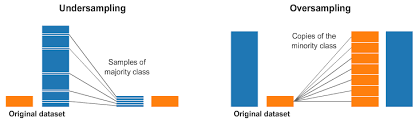

## 1. Tạo thêm mẫu cho lớp thiểu số

In [1]:
# Cho tập mẫu
import numpy as np
import pandas as pd

hacide= pd.read_csv('data/hacide/hacide_train.csv', index_col= 0)
hacide.cls.value_counts()

0    980
1     20
Name: cls, dtype: int64

Với dữ liệu mất cân bằng mà số lượng của nhóm thiểu số cũng quá ít như vậy thì sẽ không còn cách nào khác ngoại trừ tạo thêm mẫu cho lớp thiểu số.

### Tạo thêm các mẫu ngẫu nhiên cho lớp thiểu số (Random over-sampling)  
Phương pháp này tuy có thể giải quyết được vấn đề mất cân bằng dữ liệu nhưng nó có một số nhược điểm là ngoài tốn nhiều tài nguyên máy tính để tính toán (nhược điểm chung của nhóm Over-sampling) còn dễ gây ra hiện tượng quá khớp (mô hình dự đoán tốt trên tập huấn luyện mà không tốt trên tập kiểm định).

In [2]:
hacide_0= hacide[hacide.cls == 0]
hacide_1= hacide[hacide.cls == 1]

hacide_1_choice= np.random.choice(hacide_1.index, replace= True, size= hacide_0.shape[0])
hacide_1_resample= hacide_1.loc[hacide_1_choice,:]

hacide_final= hacide_0.append(hacide_1_resample)
hacide_final.cls.value_counts()

1    980
0    980
Name: cls, dtype: int64

## 2. Giảm mẫu của lớp đa số

Nhóm phương pháp giảm mẫu của lớp đa số nhìn chung có nguy cơ làm mất đi một số thông tin mà các mẫu bị xóa bỏ đã thể hiện. Trong nhóm này chia thành 2 nhóm nhỏ đó là:
- Tạo một lượng mẫu mới ít hơn ban đầu cho lớp đa số nhưng đảm bảo đại diện;
- Lựa chọn giữ lại các mẫu đại diện cho lớp đa số.  

In [3]:
# Cho tập mẫu
churn= pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Giảm mẫu nhóm đa số ngẫu nhiên (Random under-sampling)

In [4]:
churn_No= churn[churn.Churn == 'No']
churn_Yes= churn[churn.Churn == 'Yes']

churn_No_choice= np.random.choice(churn_No.index, replace= True, size= churn_Yes.shape[0])
churn_No_resample= churn_No.loc[churn_No_choice,:]

churn_final= churn_Yes.append(churn_No_resample)
churn_final.Churn.value_counts()


Yes    1869
No     1869
Name: Churn, dtype: int64

## 3. Thư viện imbalanced-learn

Thư viện imbalanced-learn tương thích với Scikit-learn có cung cấp nhiều phương pháp giảm mẫu, thêm mẫu và kết hợp để xử lý bộ mẫu mất cân bằng đồng thời cung cấp sẵn các thuật toán phân loại tối ưu cho mẫu mất cân bằng. Hướng dẫn sử dụng của thư viện này rất chi tiết và đầy đủ minh họa tại [đây](https://imbalanced-learn.org/) hoặc mã nguồn tại [đây](https://github.com/scikit-learn-contrib/imbalanced-learn).  
Các phương pháp và thuật toán mà thư viện imbalanced-learn hỗ trợ tại version 0.6.2 gồm:  
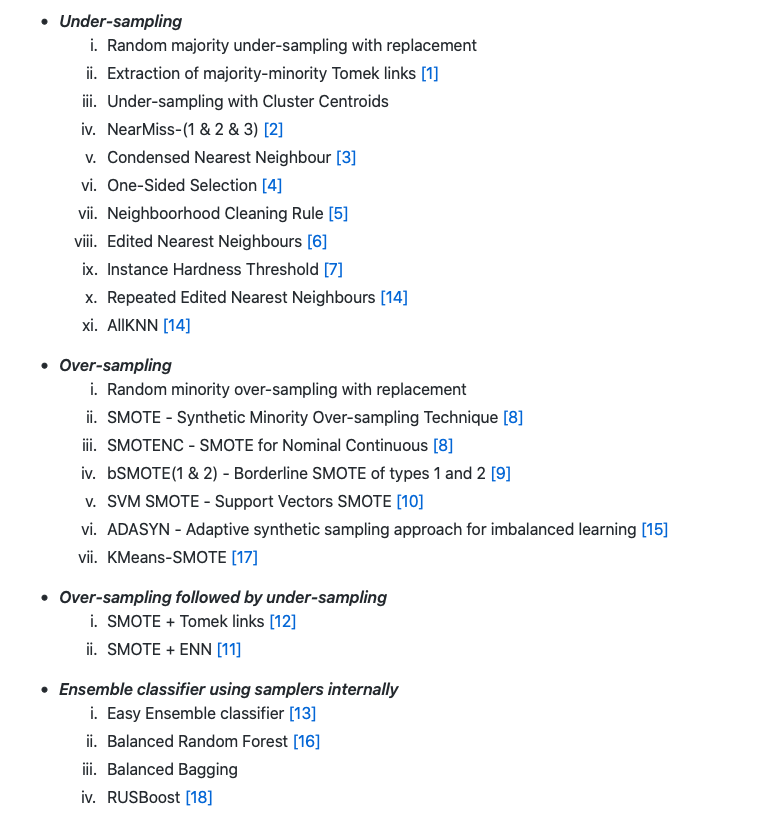

__Lưu ý:__ Các thuật toán lấy lại mẫu hầu hết sử dụng tính toán dựa trên khoảng cách vì vậy đều đòi hỏi các biến số ở dạng định lượng. Nếu không ở dạng định lượng cần đã hóa trước khi đưa vào thuật toán. Một số lớp hỗ trợ biến số phân loại là: random under sampling, random over sampling và SMOTENC (SMOTENC tương tự như SMOTE nhưng được tích hợp sẵn tính năng tự động tạo biến giả để tính toán và tự động đảo ngược lại nhãn ban đầu cho các biến phân loại)

### 3.1. Lấy thêm mẫu lớp thiểu số sử dụng lớp SMOTENC

In [5]:
# Một tập con của tập churn
X1= churn[['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'PaymentMethod']]
y1= churn.Churn

In [6]:
from collections import Counter
from imblearn.over_sampling import SMOTENC

print('Kích thước tập X1 ban đầu:', X1.shape)
print('Số lượng mỗi lớp trong tập y1 ban đầu:', Counter(y1))

smnc = SMOTENC(categorical_features=[0, 4]) # Cần chỉ định vị trí cột biến số phân loại
X1_smnc_res, y1_smnc_res= smnc.fit_resample(X1, y1)

print('Kích thước tập X1 sau khi lấy thêm mẫu:', X1_smnc_res.shape)
print('Số lượng mỗi lớp trong tập y1 sau khi lấy thêm mẫu:', Counter(y1_smnc_res))

Kích thước tập X1 ban đầu: (7043, 5)
Số lượng mỗi lớp trong tập y1 ban đầu: Counter({'No': 5174, 'Yes': 1869})
Kích thước tập X1 sau khi lấy thêm mẫu: (10348, 5)
Số lượng mỗi lớp trong tập y1 sau khi lấy thêm mẫu: Counter({'No': 5174, 'Yes': 5174})


### 3.2. Lấy thêm mẫu lớp thiểu số sử dụng lớp SMOTE

In [7]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
print('Kích thước tập X1 ban đầu:', X1.shape)
print('Số lượng mỗi lớp trong tập y1 ban đầu:', Counter(y1))

categorical_features= ['gender', 'PaymentMethod']
X1_categorical= X1[categorical_features]
X1_continuous= X1.drop(columns= categorical_features)

oh_encode= OneHotEncoder(handle_unknown= 'ignore', sparse= False)
oh_encoder= oh_encode.fit(X1_categorical)
X1_categorical= oh_encoder.transform(X1_categorical)

dummies_features= oh_encoder.get_feature_names(categorical_features)
X1_categorical= pd.DataFrame(X1_categorical, columns=  dummies_features)
X1_encoded= X1_categorical.join(X1_continuous)
print('Kích thước tập X1 sau khi mã hóa:', X1_encoded.shape)

sm= SMOTE()
X1_encoded_sm_res, y_sm_res= sm.fit_resample(X1_encoded, y1)
print('Kích thước tập X1 sau khi lấy thêm mẫu:', X1_encoded_sm_res.shape)
print('Số lượng mỗi lớp trong tập y1 sau khi lấy thêm mẫu:', Counter(y_sm_res))

Kích thước tập X1 ban đầu: (7043, 5)
Số lượng mỗi lớp trong tập y1 ban đầu: Counter({'No': 5174, 'Yes': 1869})
Kích thước tập X1 sau khi mã hóa: (7043, 9)
Kích thước tập X1 sau khi lấy thêm mẫu: (10348, 9)
Số lượng mỗi lớp trong tập y1 sau khi lấy thêm mẫu: Counter({'No': 5174, 'Yes': 5174})


Sau khi xử lý mất cân bằng dữ liệu nếu như thuật toán học máy không hỗ trợ các biến phân loại thì chúng ta có thể tiếp tục sử dụng tập dữ liệu sau khi lấy thêm mẫu tuy nhiên các thuật toán học máy có hỗ trợ biến phân loại chúng ta có thể sẽ cần gán nhãn lại cho các biến phân loại. Các thuật toán lấy mẫu không hỗ trợ biến số phân loại khác cũng có thể sử dụng như dưới

In [8]:
X1_sm_res= oh_encoder.inverse_transform(X1_encoded_sm_res[dummies_features])
X1_sm_res= pd.DataFrame(X1_sm_res, columns= categorical_features)
X1_sm_res= X1_sm_res.join(X1_encoded_sm_res.drop(columns= dummies_features))

print('Kích thước tập X1 sau khi gán lại nhãn:', X1_sm_res.shape)

Kích thước tập X1 sau khi gán lại nhãn: (10348, 5)


### 3.3. Giảm mẫu lớp đa số sử dụng NearMiss

In [9]:
from collections import Counter
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
print('Kích thước tập X1 ban đầu:', X1.shape)
print('Số lượng mỗi lớp trong tập y1 ban đầu:', Counter(y1))

categorical_features= ['gender', 'PaymentMethod']
X1_categorical= X1[categorical_features]
X1_continuous= X1.drop(columns= categorical_features)

oh_encode= OneHotEncoder(handle_unknown= 'ignore', sparse= False)
oh_encoder= oh_encode.fit(X1_categorical)
X1_categorical= oh_encoder.transform(X1_categorical)

dummies_features= oh_encoder.get_feature_names(categorical_features)
X1_categorical= pd.DataFrame(X1_categorical, columns=  dummies_features)
X1_encoded= X1_categorical.join(X1_continuous)
print('Kích thước tập X1 sau khi mã hóa:', X1_encoded.shape)

nm = NearMiss()
X1_encoded_nm_res, y1_nm_res= nm.fit_resample(X1_encoded, y1)

print('Kích thước tập X1 sau khi lấy thêm mẫu:', X1_encoded_nm_res.shape)
print('Số lượng mỗi lớp trong tập y1 sau khi lấy thêm mẫu:', Counter(y1_nm_res))

X1_mm_res= oh_encoder.inverse_transform(X1_encoded_nm_res[dummies_features])
X1_mm_res= pd.DataFrame(X1_mm_res, columns= categorical_features)
X1_mm_res= X1_mm_res.join(X1_encoded_nm_res.drop(columns= dummies_features))

print('Kích thước tập X1 sau khi gán lại nhãn:', X1_mm_res.shape)

Kích thước tập X1 ban đầu: (7043, 5)
Số lượng mỗi lớp trong tập y1 ban đầu: Counter({'No': 5174, 'Yes': 1869})
Kích thước tập X1 sau khi mã hóa: (7043, 9)
Kích thước tập X1 sau khi lấy thêm mẫu: (3738, 9)
Số lượng mỗi lớp trong tập y1 sau khi lấy thêm mẫu: Counter({'No': 1869, 'Yes': 1869})
Kích thước tập X1 sau khi gán lại nhãn: (3738, 5)
